# Splines

In [1]:
from IPython import get_ipython

if get_ipython():
    get_ipython().run_line_magic("load_ext", "autoreload")
    get_ipython().run_line_magic("autoreload", "2")

import numpy as np
import pandas as pd
import torch

import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

import collections

import latenta as la

la.logger.setLevel("INFO")

## Random walks

In [2]:
cells = la.Dim(pd.Series(range(100), name="cell").astype(str))
genes = la.Dim(pd.Series(range(4), name="gene").astype(str))

In [3]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal())

In [4]:
dist.run()
print(dist.value)
print(dist.likelihood)

tensor([ 0.0000,  1.2658, -0.0512,  1.2483,  0.2074,  0.3777, -1.2363, -0.9512,
         1.1159,  1.6814])
tensor([-14.9792])


In [5]:
knots = la.Dim(range(10), "knot")

In [6]:
dist = la.distributions.RandomWalk(
    10, la.distributions.Normal(), definition=la.Definition([genes, knots])
)

In [7]:
dist.run()
print(dist.value)
print(dist.likelihood)

tensor([[ 0.0000,  1.6299,  0.1408,  3.0288,  3.6929,  4.6615,  4.5734,  4.7146,
          5.0514,  5.4395],
        [ 0.0000, -0.9295,  0.6896, -0.2738, -0.1324,  1.2500,  1.2798,  1.8075,
          0.3411, -0.5523],
        [ 0.0000, -0.5616,  0.8078, -0.9620, -1.0304,  0.1681,  0.5358,  0.4759,
          1.4212,  2.0224],
        [ 0.0000, -1.3469, -1.3817, -1.4782, -1.7874, -1.3933, -1.0145, -1.9359,
         -3.2857, -3.2138]])
tensor([[-15.7133],
        [-13.0568],
        [-12.3494],
        [-10.7181]])


In [8]:
knots = la.Dim(range(10), "knot")

In [9]:
dist = la.distributions.RandomWalk(
    10, la.distributions.Normal(), definition=la.Definition([knots, genes])
)

In [10]:
dist.reset()
dist.run()
print(dist.value)
print(dist.step.likelihood)
print(dist.likelihood)
print(dist.log_prob(dist.value))
print(dist.log_prob(torch.zeros(dist.value.shape)))

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000],
        [-0.3239, -0.3737,  1.9869,  1.8357],
        [ 0.7968, -0.2703,  1.5411,  2.7675],
        [ 0.2297, -1.3247,  1.7564,  3.4865],
        [-0.2102, -3.0615,  1.4455,  3.7480],
        [ 0.0918, -1.9414,  1.6850,  4.9101],
        [-0.6452, -2.7093,  0.4333,  6.2496],
        [-0.9115, -3.2976,  0.4978,  5.8898],
        [ 0.9760, -3.8890,  0.9325,  5.0026],
        [ 1.6189, -2.8840,  2.6069,  4.4345]])
tensor([[-0.9714, -0.9888, -2.8928, -2.6039],
        [-1.5469, -0.9243, -1.0183, -1.3531],
        [-1.0797, -1.4748, -0.9421, -1.1774],
        [-1.0157, -2.4271, -0.9673, -0.9531],
        [-0.9645, -1.5463, -0.9476, -1.5942],
        [-1.1905, -1.2138, -1.7023, -1.8160],
        [-0.9544, -1.0920, -0.9210, -0.9837],
        [-2.7003, -1.0938, -1.0134, -1.3124],
        [-1.1256, -1.4239, -2.3208, -1.0803]])
tensor([[-11.5490, -12.1848, -12.7257, -12.8741]])
tensor([[-11.5490, -12.1848, -12.7257, -12.8741]])
tensor([[-8.2704, -8.2

In [11]:
dist = la.distributions.RandomWalk(
    10, la.distributions.Normal(definition=la.Definition([genes]))
)
dist.plot()

In [12]:
dist.reset()
dist.run()
print(dist.value)
print(dist.step.likelihood)
print(dist.likelihood)
print(dist.log_prob(dist.value))
print(dist.log_prob(torch.zeros(dist.value.shape)))

tensor([[ 0.0000,  1.8109,  0.4590,  0.4786, -0.2100, -1.5044, -1.4680, -0.3101,
         -0.7823, -1.1393],
        [ 0.0000,  0.4441,  1.8208,  2.7020,  3.7241,  4.0794,  2.9532,  1.9343,
          2.3315,  3.3131],
        [ 0.0000, -0.4500, -0.9737, -1.7715, -0.4833, -0.9287, -2.0876, -1.9016,
         -1.8926, -2.6012],
        [ 0.0000,  0.1289, -0.6425, -0.8919, -2.2559, -4.2338, -4.9232, -4.5319,
         -4.3078, -5.1244]])
tensor([[-2.5586, -1.8328, -0.9191, -1.1561, -1.7566, -0.9196, -1.5893, -1.0304,
         -0.9827],
        [-1.0176, -1.8666, -1.3072, -1.4413, -0.9820, -1.5530, -1.4380, -0.9978,
         -1.4007],
        [-1.0202, -1.0561, -1.2372, -1.7487, -1.0181, -1.5905, -0.9362, -0.9190,
         -1.1700],
        [-0.9272, -1.2165, -0.9500, -1.8492, -2.8748, -1.1566, -0.9955, -0.9441,
         -1.2523]])
tensor([[-12.7451],
        [-12.0043],
        [-10.6959],
        [-12.1663]])
tensor([[-12.7451],
        [-12.0043],
        [-10.6959],
        [-12.1663]])


In [13]:
genes = la.Dim(pd.Series(range(100), name="gene").astype(str))

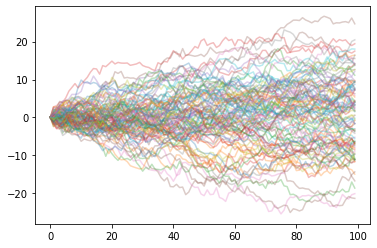

In [14]:
dist = la.distributions.RandomWalk(
    100, la.distributions.Normal(scale=1.0, definition=la.Definition([genes]))
)
dist.run()
value = dist.value.cpu().numpy()
for i in range(value.shape[0]):
    sns.lineplot(x=np.arange(value.shape[1]), y=value[i], alpha=0.3)

In [15]:
latent = la.Latent(dist)

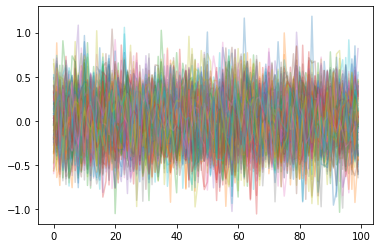

In [16]:
latent.q.run()
value = latent.q.value.detach().cpu().numpy()
for i in range(value.shape[0]):
    sns.lineplot(x=np.arange(value.shape[1]), y=value[i], alpha=0.3)

## Generative model

In [17]:
n_cells = 50
cell_ids = [str(i) for i in range(n_cells)]
cells = la.Dim(pd.Series(cell_ids, name="cell"))

x = la.Fixed(pd.Series(np.random.uniform(0, 20, n_cells), index=cells.index), label="x")

In [18]:
n_genes = 100
n_knots = 10
genes = la.Dim([str(i) for i in range(n_genes)], name="gene")
knots = la.Dim(range(n_knots), name="knot")

steps = (
    np.random.choice([-1, 1], (n_genes, n_knots))
    * np.random.normal(3.0, 1.0, (n_genes, n_knots))
    * (np.random.random((n_genes, n_knots)) > 0.5)
)
a_value = steps.cumsum(1)
a_value = a_value - a_value.mean(1, keepdims=True)
a = la.Fixed(pd.DataFrame(a_value, columns=knots.index, index=genes.index), label="a")
intercept = la.Fixed(
    pd.Series(
        np.random.choice([-1, 1], n_genes)
        * np.random.normal(3.0, 1.0, n_genes)
        * (np.random.random(n_genes) > 0.5),
        index=genes.index,
    ),
    label="intercept",
)
scale = la.Fixed(
    pd.Series(np.random.uniform(1.0, 1.2, n_genes), index=genes.index), label="scale"
)

In [19]:
y = la.links.scalar.Spline(x=x, a=a, b=intercept)
dist = la.distributions.Normal(loc=y, scale=scale, label="distribution")

In [20]:
model_gs = la.Root(dist=dist, label="ground truth", symbol="gs")
model_gs.plot()

In [21]:
posterior = la.posterior.Posterior(dist, retain_samples={dist.loc, dist})
posterior.sample(1)

  0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='gene', ylabel='cell'>

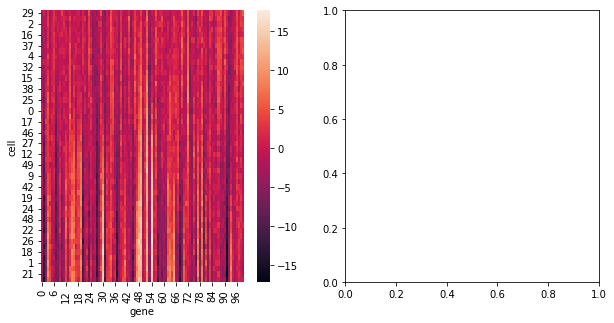

In [22]:
loc_value = posterior.samples[dist.loc].sel(sample=0).to_pandas()
observation_value = posterior.samples[dist].sel(sample=0).to_pandas()
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
cell_order = model_gs.find("x").prior_pd().sort_values().index
sns.heatmap(observation_value.loc[cell_order], ax=ax0)

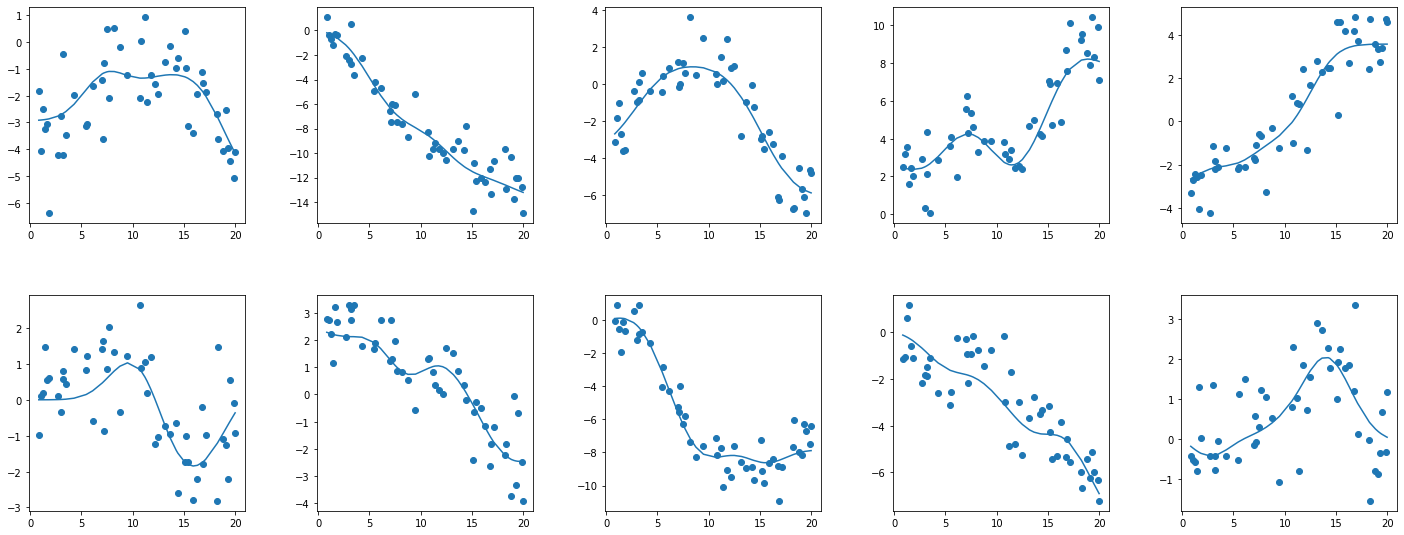

In [23]:
observation_value = posterior.samples[dist].sel(sample=0).to_pandas()
gene_ids = genes.coords[:10]
fig, axes = la.plotting.axes_wrap(len(gene_ids))
cell_order = model_gs.find("x").prior_pd().sort_values().index
x_value = model_gs.find("x").prior_pd()

for gene_id, ax in zip(gene_ids, axes):
    ax.scatter(x_value.loc[cell_order], observation_value.loc[cell_order, gene_id])
    ax.plot(x_value.loc[cell_order], loc_value.loc[cell_order, gene_id])
# sns.heatmap(observation_value.loc[cell_order], ax = ax0)

## Regression with variational inference

In [24]:
s = la.Parameter(
    1.0, definition=scale, transforms=la.distributions.Exponential().transform_to()
)

z = la.links.scalar.Spline(
    x, b=intercept, knot=model_gs.find("knot"), output=model_gs.dist.value_definition
)

dist = la.distributions.Normal(loc=z, scale=s)

observation = la.Observation(observation_value, dist, label="observation")

In [25]:
model = la.Root(observation=observation)
model.plot()

  0%|                                                                                                         …

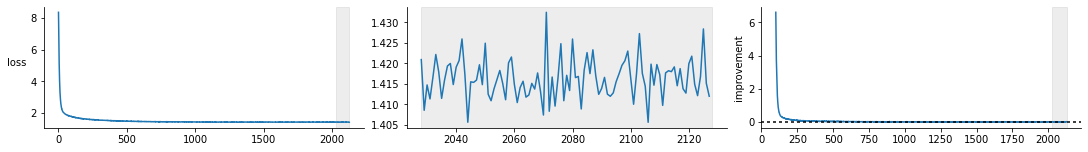

In [26]:
inference = la.infer.svi.SVI(
    model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr=0.05)
)
trainer = la.infer.trainer.Trainer(inference)
trace = trainer.train(3000)
trace.plot()
# inference = la.infer.svi.SVI(model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr = 0.05))
# trainer = la.infer.trainer.Trainer(inference)
# trace = trainer.train(3000)
# trace.plot();

In [27]:
observed = la.posterior.Posterior(
    observation, retain_samples=model.components_upstream().values()
)
observed.sample(10, subsample_n=1)

  0%|          | 0/10 [00:00<?, ?it/s]

<AxesSubplot:xlabel='gene', ylabel='cell'>

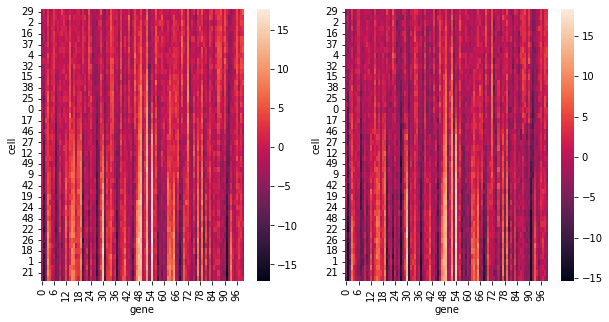

In [28]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
cell_order = model_gs.find("x").prior_pd().sort_values().index
sns.heatmap(observation_value.loc[cell_order], ax=ax0)
modelled_value = observed.samples[observation.p].sel(sample=0).to_pandas()
sns.heatmap(modelled_value.loc[cell_order], ax=ax1)

In [29]:
x_causal = la.posterior.scalar.ScalarVectorCausal(x, observation)
x_causal.sample(10)
x_causal.observed.sample()
x_causal.sample_empirical()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

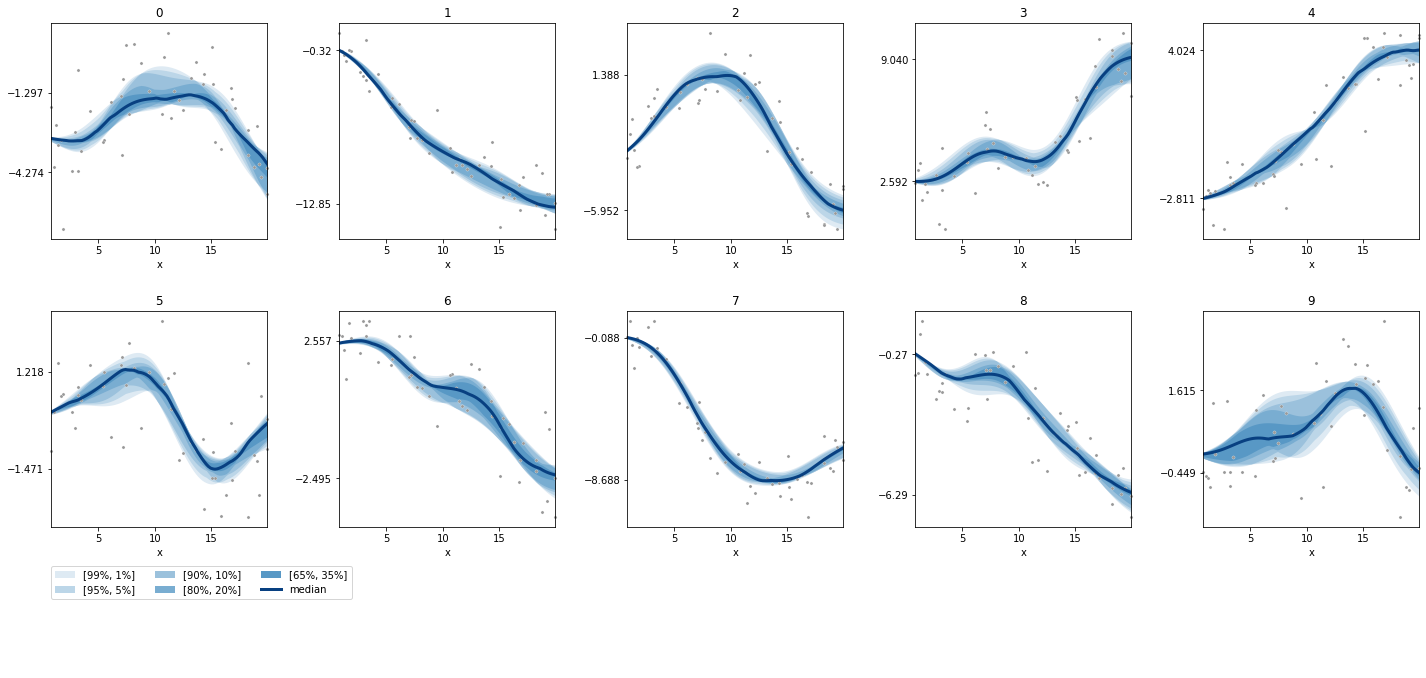

In [30]:
x_causal.plot_features()

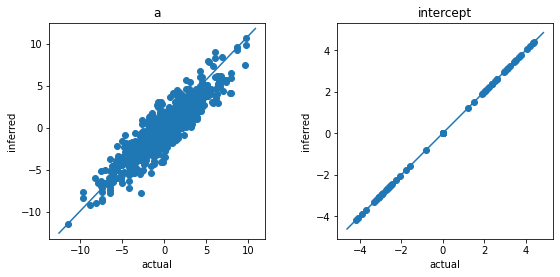

In [31]:
parameter_values = la.qa.cookbooks.check_parameters(
    la.qa.cookbooks.gather_parameters(["a", "intercept"], model_gs, observed)
)

In [32]:
dim = la.Dim([1, 2, 3, 4], "h")

In [33]:
x_value = pd.Series([1.0, 2.0, 3.0, 0.0], index=dim.index, name="x")
x = la.Fixed(x_value)

y = la.links.scalar.Spline(x)

assert y.value_definition[0] == x[0]
assert y.ndim == 1